In [10]:
import glob
import os
import pandas as pd
import numpy as np

In [45]:
def read_multiple_files(directory):
    ''' Read multiple EEG recordings in directory '''
    dfs_folders = []
    for folder in os.listdir(directory):
        if '.' not in folder:
            print(folder)
            folder_files = glob.glob(directory+ '/' +folder + '/*')
            folder_dataframes = [pd.read_csv(f) for f in folder_files]
            df_folder = pd.concat(folder_dataframes, sort=True)
            df_folder['Folder'] = folder
            dfs_folders.append(df_folder)
    df = pd.concat(dfs_folders, sort=True)
    return df

In [46]:
df = read_multiple_files('data')

anxiety_and_sleep_eeg
basal_eeg


In [47]:
# Add timestamp
df = df.set_index(pd.DatetimeIndex(df['TimeStamp']))

In [48]:
# Remove mysterious column that appears from concatenation
try:
    del df['Unnamed: 0'] 
except:
    None

In [49]:
df.keys()

Index(['AUX_RIGHT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Alpha_TP9', 'Battery',
       'Beta_AF7', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Delta_AF7',
       'Delta_AF8', 'Delta_TP10', 'Delta_TP9', 'Elements', 'Folder',
       'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Gamma_TP9', 'Gyro_X', 'Gyro_Y',
       'Gyro_Z', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'HSI_TP9', 'HeadBandOn',
       'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'RAW_TP9', 'Theta_AF7', 'Theta_AF8',
       'Theta_TP10', 'Theta_TP9', 'TimeStamp'],
      dtype='object')

In [50]:
df.head()

,AUX_RIGHT,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Alpha_AF7,Alpha_AF8,Alpha_TP10,Alpha_TP9,Battery,Beta_AF7,...,HeadBandOn,RAW_AF7,RAW_AF8,RAW_TP10,RAW_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Theta_TP9,TimeStamp
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-03-06 06:08:22.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.434
2020-03-06 06:08:22.633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.633
2020-03-06 06:08:22.934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06 06:08:22.934
2020-03-06 06:08:23.398,755.897436,-0.917236,0.214294,0.357239,0.286422,0.046419,0.685609,0.560574,100.0,0.131055,...,1.0,784.908425,799.816850,474.249084,429.120879,0.157565,0.312778,0.513176,0.57944,2020-03-06 06:08:23.398
2020-03-06 06:08:24.392,145.860806,-0.915955,0.212708,0.355042,0.004473,-0.068840,0.899300,0.560574,100.0,0.230174,...,1.0,753.882784,831.245421,306.630037,219.194139,-0.036244,0.225367,1.142064,0.57944,2020-03-06 06:08:24.392


In [51]:
# delta-beta cross-frequency as measure for anxiety 

    # doi:10.3758/s13415-016-0455-y
    # sci-hub.tw/10.1016/j.paid.2019.109796
    
    # doi:10.3758/s13415-016-0455-y
    # sci-hub.tw/10.3758/s13415-016-0455-y

In [52]:
# basal = everyday anxiety (normal activities, 2 meds, 1 beer)
# anxiety = high anxiety followed by meds + sleep

### separate 1)normal, 2)high anxiety, 3)sleep
df_basal = df[df['Folder'] == 'basal_eeg'].copy()
df_basal = df_basal['2020-03-05 18:10':'2020-03-05 18:50']
df_anxiety_sleep = df[df['Folder'] == 'anxiety_and_sleep_eeg'].copy()
df_anxiety = df_anxiety_sleep['2020-03-06 06:10':'2020-03-06 06:50']
df_sleep = df_anxiety_sleep['2020-03-06 06:51':'2020-03-06 08:30'] 

In [53]:
# Some exploration

In [54]:
# Maybe jaw clenching or blinking could be informative

In [55]:
def blink_jaw_ratio(df):
    df_elements = df['Elements'].value_counts()
    print(df_elements)
    df_elements_keys = list(df_elements.keys())
    return df_elements[df_elements_keys[0]]/df_elements[df_elements_keys[1]]

In [56]:
blink_jaw_ratio(df_basal)

/muse/elements/blink         1420
/muse/elements/jaw_clench     127
Name: Elements, dtype: int64


11.181102362204724

In [57]:
blink_jaw_ratio(df_anxiety)

/muse/elements/blink         1348
/muse/elements/jaw_clench      61
Name: Elements, dtype: int64


22.098360655737704

In [58]:
blink_jaw_ratio(df_sleep)

/muse/elements/blink         64
/muse/elements/jaw_clench     1
Name: Elements, dtype: int64


64.0

In [59]:
# plots

In [60]:
%matplotlib inline

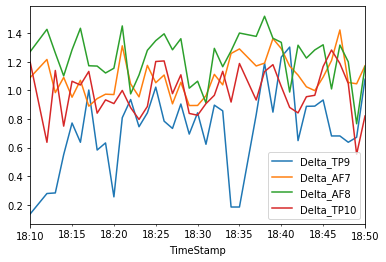

In [61]:
delta_columns = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']
minutal_basal = df_basal.index.to_period('Min')
df_basal.groupby(minutal_basal)[delta_columns].apply(lambda x: np.mean(x)).plot()

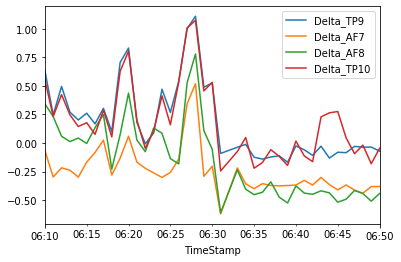

In [62]:
minutal_anxiety = df_anxiety.index.to_period('Min')
df_anxiety.groupby(minutal_anxiety)[delta_columns].apply(lambda x: np.mean(x)).plot()

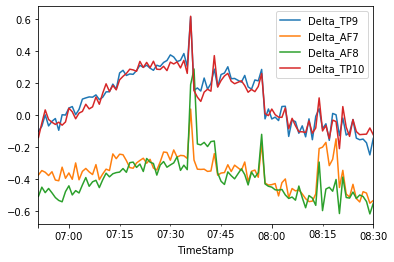

In [63]:
minutal_sleep = df_sleep.index.to_period('Min')
df_sleep.groupby(minutal_sleep)[delta_columns].apply(lambda x: np.mean(x)).plot()

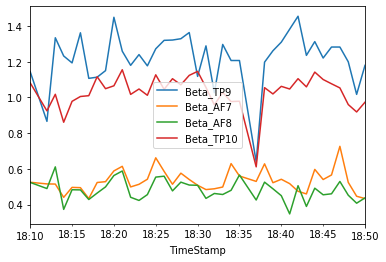

In [64]:
beta_columns = ['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']
df_basal.groupby(minutal_basal)[beta_columns].apply(lambda x: np.mean(x)).plot()

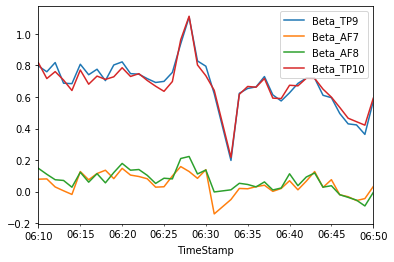

In [65]:
df_anxiety.groupby(minutal_anxiety)[beta_columns].apply(lambda x: np.mean(x)).plot()

In [72]:
        # basal delta-beta

df_basal = df_basal[delta_columns + beta_columns]

df_basal['delta_avg'] = df_basal[delta_columns].mean(axis=1) # delta avg
df_basal['beta_avg'] = df_basal[beta_columns].mean(axis=1) # beta avg

In [75]:
        # anxiety delta-beta

df_anxiety = df_anxiety[delta_columns + beta_columns]

df_anxiety['delta_avg'] = df_anxiety[delta_columns].mean(axis=1) # delta avg
df_anxiety['beta_avg'] = df_anxiety[beta_columns].mean(axis=1) # beta avg

In [82]:
        # sleep delta-beta

df_sleep = df_sleep[delta_columns + beta_columns]

df_sleep['delta_avg'] = df_sleep[delta_columns].mean(axis=1) # delta avg
df_sleep['beta_avg'] = df_sleep[beta_columns].mean(axis=1) # beta avg

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


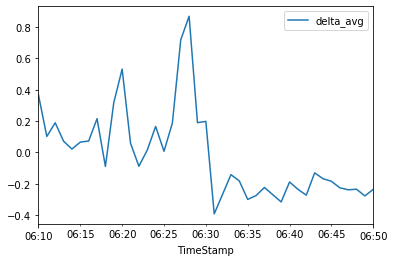

In [77]:
        # plot test

df_anxiety.groupby(df_anxiety.index.to_period('Min'))[['delta_avg']].apply(lambda x: np.mean(x)).plot()

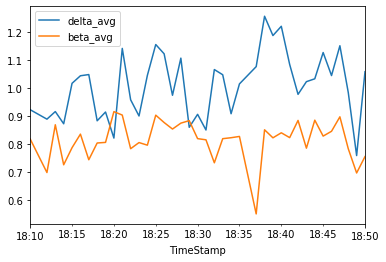

In [78]:
    # normal activity
df_basal.groupby(df_basal.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

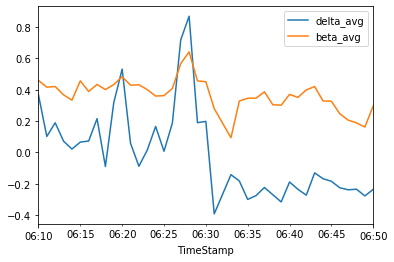

In [83]:
    # anxiety
df_anxiety.groupby(df_anxiety.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

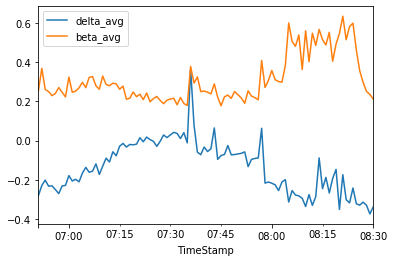

In [84]:
    # sleeping after med
df_sleep.groupby(df_sleep.index.to_period('Min'))[['delta_avg', 'beta_avg']].apply(lambda x: np.mean(x)).plot()

In [86]:
### delta-beta correlation

    # normal
rho1 = df_basal[['delta_avg', 'beta_avg']].dropna().corr()

    # high anxiety
rho2 = df_anxiety[['delta_avg', 'beta_avg']].dropna().corr()

    # high anxiety
rho3 = df_sleep[['delta_avg', 'beta_avg']].dropna().corr()

In [87]:
rho1 # normal

,delta_avg,beta_avg
delta_avg,1.000000,0.270172
beta_avg,0.270172,1.000000


In [88]:
rho2 # anxiety

,delta_avg,beta_avg
delta_avg,1.000000,0.468012
beta_avg,0.468012,1.000000


In [89]:
rho3 # sleep

,delta_avg,beta_avg
delta_avg,1.000000,-0.103392
beta_avg,-0.103392,1.000000
